### SUPERVISED LEARNING


C:\Users\talia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loaded: 101766 rows × 50 cols
Mapping file present but unrecognized format — skipping.
Numeric features: 11 | Categorical features: 36

=== Q1 Preprocessing Summary ===
Original shape: 101766 rows
Transformed features: (101766, 2425) (sparse)
Class balance (readmitted_30d):
readmitted_30d
0    0.888401
1    0.111599
Name: proportion, dtype: float64
[Stage A] Building stratified subsample of size 30000 ...
[Stage A] Subsample shape: (30000, 2425), time: 0.0s
[Stage A] Fitting fast SGD L1 path ...


Stage A: SGD L1 path: 100%|██████████| 12/12 [00:00<00:00, 13.79alpha/s]


[Stage A] Selected Top-30 features for the exact path.
[Stage B] Restricting X to Top-K features (full data) ...
[Stage B] Reduced shape: (101766, 30), time: 0.1s
[Stage B] Fitting exact L1-logistic path on full data (Top-K features) ...


Stage B: exact L1 path: 100%|██████████| 12/12 [02:08<00:00, 10.69s/C]



Done.
Figure: C:\Users\talia\OneDrive\Bureau\fac\annee 24-25\semestre 2\Modern Statistical Data Analysis\Project\q2_lasso_path_two_stage\lasso_path_exact_full_top30.png
Ranking (exact): C:\Users\talia\OneDrive\Bureau\fac\annee 24-25\semestre 2\Modern Statistical Data Analysis\Project\q2_lasso_path_two_stage\feature_importance_exact_path.csv
Stage-A screening (approx): C:\Users\talia\OneDrive\Bureau\fac\annee 24-25\semestre 2\Modern Statistical Data Analysis\Project\q2_lasso_path_two_stage\stageA_top_features.csv

Top features (exact path):
                          feature  first_nonzero_step  first_nonzero_lambda  \
0                cat__miglitol_No                 0.0                1000.0   
17          num__number_inpatient                 0.0                1000.0   
1          cat__chlorpropamide_No                 0.0                1000.0   
6         cat__max_glu_serum_Norm                 0.0                1000.0   
5             cat__repaglinide_No                 0.0     

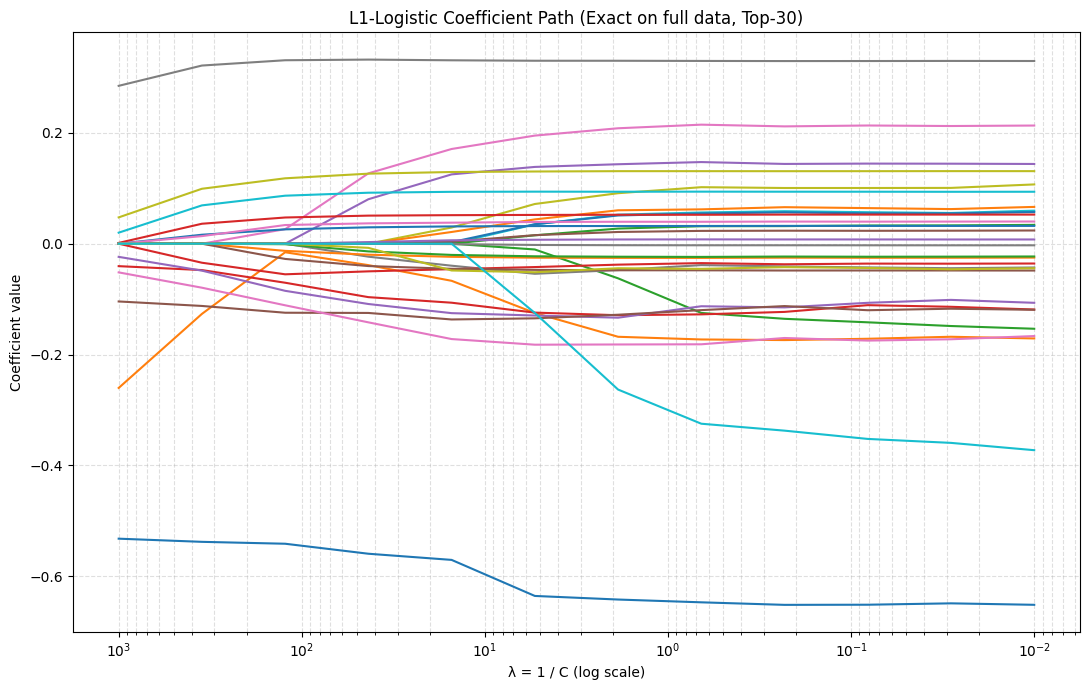

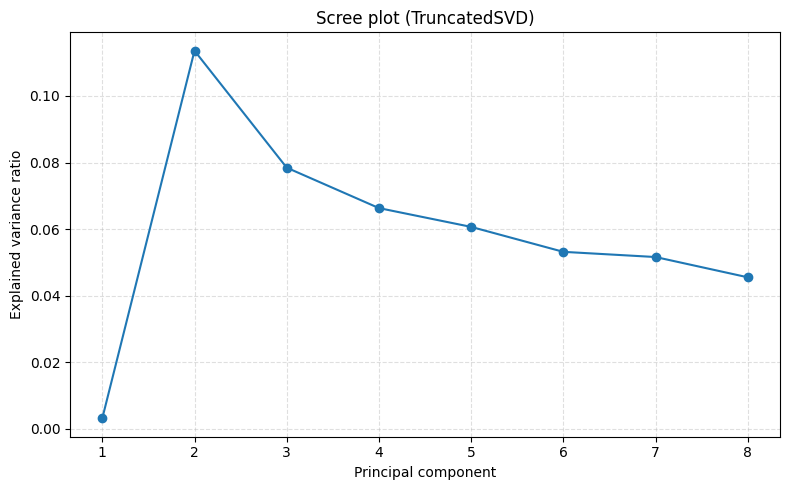

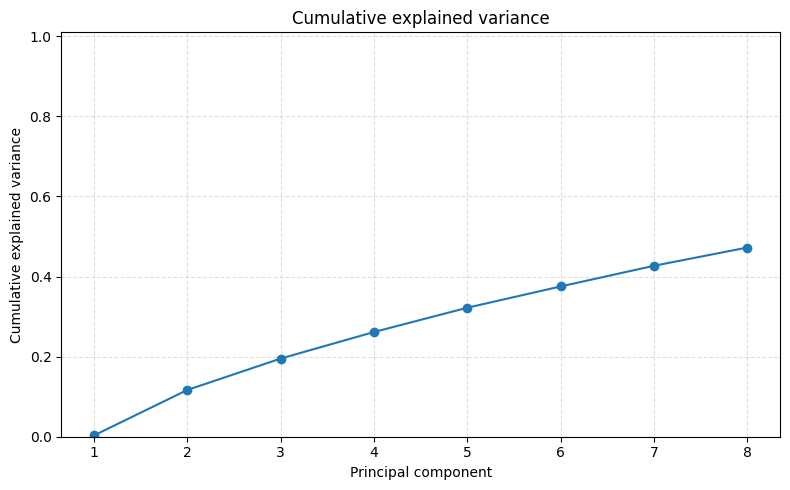

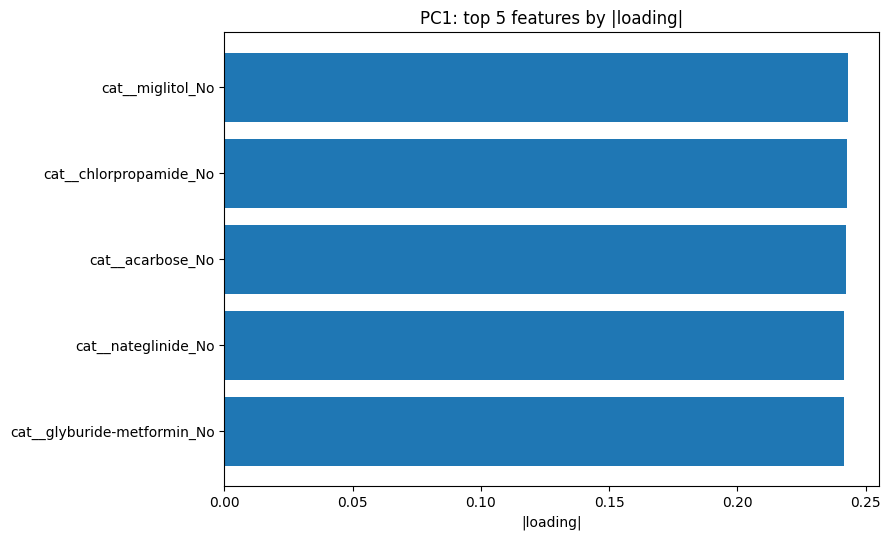


PC1 — Top 5 features by |loading|:
  cat__miglitol_No                          |loading|=0.2430
  cat__chlorpropamide_No                    |loading|=0.2428
  cat__acarbose_No                          |loading|=0.2424
  cat__nateglinide_No                       |loading|=0.2415
  cat__glyburide-metformin_No               |loading|=0.2415


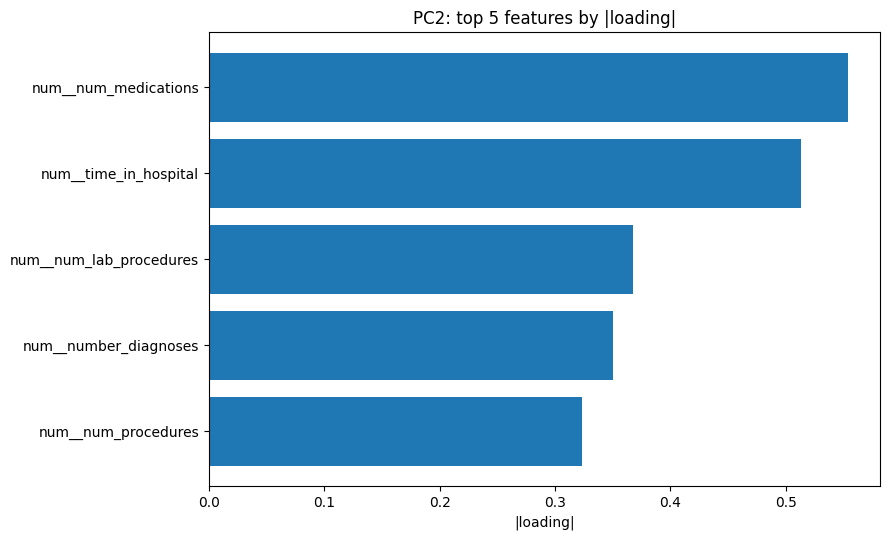


PC2 — Top 5 features by |loading|:
  num__num_medications                      |loading|=0.5541
  num__time_in_hospital                     |loading|=0.5129
  num__num_lab_procedures                   |loading|=0.3679
  num__number_diagnoses                     |loading|=0.3504
  num__num_procedures                       |loading|=0.3232


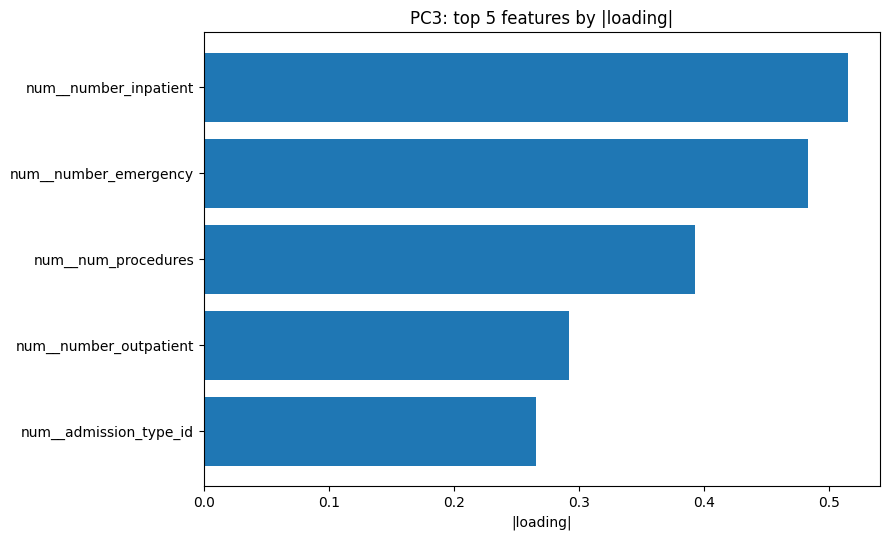


PC3 — Top 5 features by |loading|:
  num__number_inpatient                     |loading|=0.5148
  num__number_emergency                     |loading|=0.4834
  num__num_procedures                       |loading|=0.3927
  num__number_outpatient                    |loading|=0.2921
  num__admission_type_id                    |loading|=0.2659


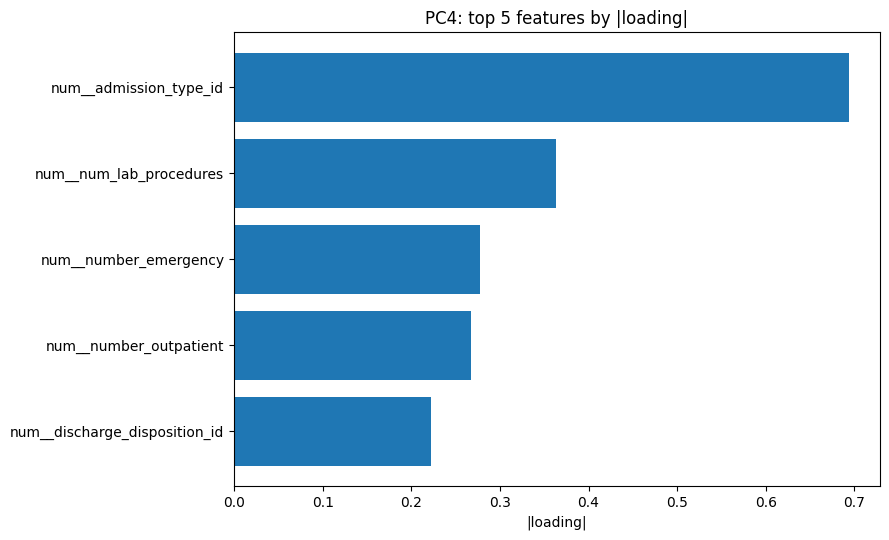


PC4 — Top 5 features by |loading|:
  num__admission_type_id                    |loading|=0.6942
  num__num_lab_procedures                   |loading|=0.3632
  num__number_emergency                     |loading|=0.2775
  num__number_outpatient                    |loading|=0.2675
  num__discharge_disposition_id             |loading|=0.2227

Saved plots to:
  q3_pca\curves  (sorted |loading| curves)
  q3_pca\bars    (barplots of Top-5 features)
Top-5 features per PC saved to: q3_pca\PC_top5_features.csv
Positive rate (baseline AP): 0.1116

Average Precision (PR-AUC) by component (top 10):
     PC        AP
0   PC3  0.166348
1   PC6  0.148958
2   PC2  0.132223
3   PC4  0.126429
4  PC10  0.123862
5   PC7  0.118834
6   PC1  0.115758
7   PC8  0.113046
8   PC5  0.111507
9  PC11  0.109409


CV (Kernel approx: RFF + LinearSVC): 100%|██████████| 8/8 [00:22<00:00,  2.80s/cfg, F1_cv=0.183, γ=0.2, n_feat=800, C=1]  



Final results (Train/Test F1):
Logistic Regression                      | Train F1: 0.295 | Test F1: 0.251 | Params: {}
KNN (k=11, euclidean)                    | Train F1: 0.070 | Test F1: 0.039 | Params: {}
Kernel SVM (RBF approx: RFF + LinearSVC) | Train F1: 0.273 | Test F1: 0.240 | Params: {'gamma': 0.1, 'n_components': 800, 'C': 0.5, 'cv_F1(10k)': 0.207}
Column sums (should be ~0): [-2.88664058e-13  1.66307940e-13  2.05343555e-13]
Column L2 norms (should be ~1): [1. 1. 1.]

Centered & normalized error Gram matrix (Ê^T Ê):
            Logistic    KNN  Kernel SVM
Logistic       1.000  0.039       0.355
KNN            0.039  1.000       0.037
Kernel SVM     0.355  0.037       1.000

Test F1 (individual): Logistic=0.251, KNN=0.039, Kernel SVM=0.240
Test F1 (majority vote): 0.255
Meta-learner (majority vote) — Train F1: 0.309, Test F1: 0.255


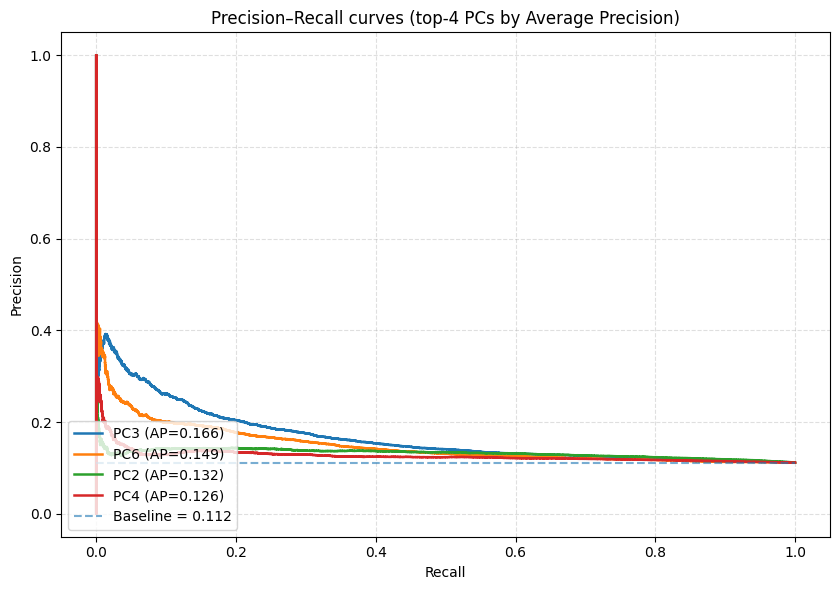

In [1]:
import os
import time
import joblib
import warnings
import numpy as np
import pandas as pd
from pathlib import Path
import scipy.sparse as sp
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.exceptions import ConvergenceWarning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.kernel_approximation import RBFSampler
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import f1_score, average_precision_score, precision_recall_curve
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score


DATA_PATH = "diabetic_data.csv"   
MAP_PATH  = "IDS_mapping.csv"
OUT_DIR   = Path("preprocessed_Q1")
OUT_DIR.mkdir(exist_ok=True, parents=True)

# Load & basic cleaning
df = pd.read_csv(DATA_PATH, low_memory=False)
print(f"Loaded: {df.shape[0]} rows × {df.shape[1]} cols")

# Replace special missing markers
df = df.replace("?", np.nan)

# Target definition
if "readmitted" not in df.columns:
    raise ValueError("Column 'readmitted' not found.")

df["readmitted_30d"] = (df["readmitted"] == "<30").astype(int)
mask_bad = df["readmitted"].isna() | ~df["readmitted"].isin(["<30", "NO", ">30"])
if mask_bad.any():
    print(f"Dropping rows with unexpected/missing readmitted values: {mask_bad.sum()}")
    df = df.loc[~mask_bad].copy()

# drop non informative IDs
drop_cols = [c for c in ["encounter_id", "patient_nbr"] if c in df.columns]
df = df.drop(columns=drop_cols)

# ,map
def apply_id_mappings(df: pd.DataFrame, map_path: str) -> pd.DataFrame:
    if not os.path.exists(map_path):
        print("Mapping file not found — skipping mappings.")
        return df

    m = pd.read_csv(map_path)
    cols_lower = set(c.lower() for c in m.columns)

    if {"variable", "code", "label"} <= cols_lower:
        var_col = [c for c in m.columns if c.lower() == "variable"][0]
        code_col = [c for c in m.columns if c.lower() == "code"][0]
        lab_col  = [c for c in m.columns if c.lower() == "label"][0]
        for var, sub in m.groupby(var_col):
            if var in df.columns:
                mp = dict(zip(sub[code_col].astype(str), sub[lab_col].astype(str)))
                df[var] = df[var].astype(str).map(mp).fillna(df[var].astype(str))
        print("Applied mappings (variable, code, label).")
        return df

    if {"column", "from", "to"} <= cols_lower:
        col_col  = [c for c in m.columns if c.lower() == "column"][0]
        from_col = [c for c in m.columns if c.lower() == "from"][0]
        to_col   = [c for c in m.columns if c.lower() == "to"][0]
        for col, sub in m.groupby(col_col):
            if col in df.columns:
                mp = dict(zip(sub[from_col].astype(str), sub[to_col].astype(str)))
                df[col] = df[col].astype(str).map(mp).fillna(df[col].astype(str))
        print("Applied mappings (column, from, to).")
        return df

    print("Mapping file present but unrecognized format — skipping.")
    return df

df = apply_id_mappings(df, MAP_PATH)

# separate features/target
y = df["readmitted_30d"].astype(int)
X = df.drop(columns=["readmitted_30d", "readmitted"], errors="ignore")

# Identify numeric/categorical columns
numeric_cols = X.select_dtypes(include=["number", "float", "int"]).columns.tolist()
categorical_cols = X.columns.difference(numeric_cols).tolist()

print(f"Numeric features: {len(numeric_cols)} | Categorical features: {len(categorical_cols)}")

# build preprocessing pipeline
num_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler(with_mean=True, with_std=True)),
])

cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", drop="first", sparse_output=True)),
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", num_pipe, numeric_cols),
        ("cat", cat_pipe, categorical_cols),
    ],
    sparse_threshold=0.3
)

# Fit on the entire dataset (Q1 only; for modeling we'll refit on the training split in Q4)
preprocess.fit(X)

# Transform the full matrix
X_pp = preprocess.transform(X)

# Try to extract feature names
try:
    feature_names = preprocess.get_feature_names_out().tolist()
except Exception:
    feature_names = None

# 7) Save artifacts
# Save transformed matrix
def save_matrix(mat, path: Path):
    try:
        import scipy.sparse as sp
        if sp.issparse(mat):
            sp.save_npz(path.with_suffix(".npz"), mat, compressed=True)
        else:
            np.save(path.with_suffix(".npy"), mat)
    except Exception as e:
        print(f"Warning while saving matrix: {e}")

save_matrix(X_pp, OUT_DIR / "X_preprocessed")
y.to_csv(OUT_DIR / "y_target.csv", index=False)

# Save a cleaned (pre-encoding) CSV for reference
df_clean = pd.concat([X, y.rename("readmitted_30d")], axis=1)
df_clean.to_csv(OUT_DIR / "diabetes_clean_Q1.csv", index=False)

# Save the fitted preprocessing pipeline
joblib.dump(preprocess, OUT_DIR / "preprocess_Q1.joblib")

# Optionally save feature names
if feature_names is not None:
    pd.Series(feature_names, name="feature_name").to_csv(OUT_DIR / "feature_names_Q1.csv", index=False)

# quick summary logs
print("\n=== Q1 Preprocessing Summary ===")
print(f"Original shape: {df.shape[0]} rows")
try:
    import scipy.sparse as sp
    pp_shape = X_pp.shape
    pp_type = "sparse" if sp.issparse(X_pp) else "dense"
    print(f"Transformed features: {pp_shape} ({pp_type})")
except Exception:
    print("Transformed matrix saved.")

print("Class balance (readmitted_30d):")
print(y.value_counts(normalize=True).rename("proportion"))


# Q2 — L1 Logistic "Lasso" Path for Classification
OUT_Q1 = Path("preprocessed_Q1")
OUT_Q2 = Path("q2_lasso_path_two_stage")
OUT_Q2.mkdir(parents=True, exist_ok=True)

X_npz = OUT_Q1 / "X_preprocessed.npz"
X_npy = OUT_Q1 / "X_preprocessed.npy"

if X_npz.exists():
    X = sp.load_npz(X_npz).tocsr().astype(np.float32)
elif X_npy.exists():
    X = sp.csr_matrix(np.load(X_npy).astype(np.float32))
else:
    raise FileNotFoundError("Preprocessed X not found (.npz or .npy).")

y = pd.read_csv(OUT_Q1 / "y_target.csv").iloc[:, 0].astype(np.int8).values

# Feature names
feat_names = None
fn_file = OUT_Q1 / "feature_names_Q1.csv"
if fn_file.exists():
    feat_names = pd.read_csv(fn_file)["feature_name"].astype(str).tolist()
else:
    pipe_file = OUT_Q1 / "preprocess_Q1.joblib"
    if pipe_file.exists():
        try:
            preprocess = joblib.load(pipe_file)
            feat_names = preprocess.get_feature_names_out().tolist()
        except Exception:
            pass
if feat_names is None:
    feat_names = [f"x{j}" for j in range(X.shape[1])]

# fast approximate path on a stratified subsample ------------
SUBSAMPLE_N = 30000     
N_ALPHAS     = 12        
EPOCHS_ALPHA = 2         
TOP_K        = 30         

print(f"[Stage A] Building stratified subsample of size {SUBSAMPLE_N} ...")
t0 = time.time()
if SUBSAMPLE_N is not None and SUBSAMPLE_N < X.shape[0]:
    sss = StratifiedShuffleSplit(n_splits=1, train_size=SUBSAMPLE_N, random_state=42)
    idx_sub, _ = next(sss.split(np.zeros_like(y), y))
    X_A = X[idx_sub]
    y_A = y[idx_sub]
else:
    X_A, y_A = X, y
print(f"[Stage A] Subsample shape: {X_A.shape}, time: {time.time()-t0:.1f}s")

alphas = np.logspace(-2, 1, N_ALPHAS)[::-1]  

clf_sgd = SGDClassifier(
    loss="log_loss",
    penalty="l1",
    alpha=alphas[0],
    max_iter=1,          
    tol=None,
    fit_intercept=True,
    learning_rate="optimal",
    random_state=42
)

coef_path_A = []
classes = np.array([0, 1], dtype=np.int32)
rng = np.random.default_rng(42)
rows = np.arange(X_A.shape[0])

print("[Stage A] Fitting fast SGD L1 path ...")
for a in tqdm(alphas, desc="Stage A: SGD L1 path", unit="alpha"):
    clf_sgd.alpha = float(a)
    for _ in range(EPOCHS_ALPHA):
        perm = rng.permutation(rows)
        clf_sgd.partial_fit(X_A[perm], y_A[perm], classes=classes)
    coef_path_A.append(clf_sgd.coef_.ravel().astype(np.float32))

coef_path_A = np.vstack(coef_path_A)              
max_abs_A = np.max(np.abs(coef_path_A), axis=0)   

entry_step_A = np.full(X_A.shape[1], np.inf)
for j in range(X_A.shape[1]):
    nz = np.where(coef_path_A[:, j] != 0)[0]
    if nz.size > 0:
        entry_step_A[j] = nz[0]

rank_df_A = pd.DataFrame({
    "feature": feat_names,
    "first_nonzero_step": entry_step_A,
    "max_abs_coef": max_abs_A
}).sort_values(by=["first_nonzero_step", "max_abs_coef"], ascending=[True, False])

top_idx = rank_df_A.index.values[:TOP_K]
top_names = rank_df_A["feature"].values[:TOP_K]

rank_df_A.iloc[:TOP_K].to_csv(OUT_Q2 / "stageA_top_features.csv", index=False)
print(f"[Stage A] Selected Top-{TOP_K} features for the exact path.")

# exact L1-logistic on FULL data, restricted to Top-K 
print("[Stage B] Restricting X to Top-K features (full data) ...")
t1 = time.time()
X_reduced = X.tocsc()[:, top_idx].tocsr()
print(f"[Stage B] Reduced shape: {X_reduced.shape}, time: {time.time()-t1:.1f}s")

# Small grid of C values (exact path)
Cs = np.logspace(-3, 2, 12)   
lambdas = 1.0 / Cs

clf_lr = LogisticRegression(
    penalty="l1",
    solver="saga",       
    max_iter=1500,
    tol=5e-4,
    fit_intercept=True,
    warm_start=True,
    n_jobs=-1
)

coef_path_B = []
print("[Stage B] Fitting exact L1-logistic path on full data (Top-K features) ...")
for C in tqdm(Cs, desc="Stage B: exact L1 path", unit="C"):
    clf_lr.set_params(C=C)
    clf_lr.fit(X_reduced, y)
    coef_path_B.append(clf_lr.coef_.ravel().astype(np.float32))

coef_path_B = np.vstack(coef_path_B)  

# plot
plt.figure(figsize=(11, 7))
for j in range(TOP_K):
    plt.plot(lambdas, coef_path_B[:, j], linewidth=1.5)
plt.xscale("log")
plt.gca().invert_xaxis()
plt.xlabel("λ = 1 / C (log scale)")
plt.ylabel("Coefficient value")
plt.title(f"L1-Logistic Coefficient Path (Exact on full data, Top-{TOP_K})")
plt.grid(True, which="both", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.savefig(OUT_Q2 / f"lasso_path_exact_full_top{TOP_K}.png", dpi=180)


# importance table 
max_abs_B = np.max(np.abs(coef_path_B), axis=0)
entry_step_B = np.full(TOP_K, np.inf)
entry_lambda_B = np.full(TOP_K, np.nan)
for j in range(TOP_K):
    nz = np.where(coef_path_B[:, j] != 0)[0]
    if nz.size > 0:
        entry_step_B[j] = nz[0]
        entry_lambda_B[j] = lambdas[nz[0]]

rank_df_B = pd.DataFrame({
    "feature": top_names,
    "first_nonzero_step": entry_step_B,
    "first_nonzero_lambda": entry_lambda_B,
    "max_abs_coef": max_abs_B
}).sort_values(by=["first_nonzero_step", "max_abs_coef"], ascending=[True, False])

rank_df_B.to_csv(OUT_Q2 / "feature_importance_exact_path.csv", index=False)

print("\nDone.")
print("Figure:", (OUT_Q2 / f"lasso_path_exact_full_top{TOP_K}.png").resolve())
print("Ranking (exact):", (OUT_Q2 / "feature_importance_exact_path.csv").resolve())
print("Stage-A screening (approx):", (OUT_Q2 / "stageA_top_features.csv").resolve())
print("\nTop features (exact path):")
print(rank_df_B.head(10))

# Q3(a) — PCA on sparse X via TruncatedSVD
OUT_Q1 = Path("preprocessed_Q1")
OUT_Q3 = Path("q3_pca")
OUT_Q3.mkdir(parents=True, exist_ok=True)

# load X (sparse), feature names (if available)
X_npz = OUT_Q1 / "X_preprocessed.npz"
if not X_npz.exists():
    raise FileNotFoundError("Expected sparse X at preprocessed_Q1/X_preprocessed.npz")

X = sp.load_npz(X_npz).tocsr().astype(np.float32)

feat_names = None
fn = OUT_Q1 / "feature_names_Q1.csv"
if fn.exists():
    feat_names = pd.read_csv(fn)["feature_name"].astype(str).tolist()
else:
    try:
        pp = joblib.load(OUT_Q1 / "preprocess_Q1.joblib")
        feat_names = pp.get_feature_names_out().tolist()
    except Exception:
        feat_names = [f"x{j}" for j in range(X.shape[1])]

# Fit TruncatedSVD (PCA for sparse)
n_comp = 8  
svd = TruncatedSVD(n_components=n_comp, random_state=42, algorithm="randomized")
svd.fit(X)

expl_var = svd.explained_variance_ratio_        
expl_var_cum = np.cumsum(expl_var)

# 3) Save explained variance table
ev_df = pd.DataFrame({
    "PC": [f"PC{i+1}" for i in range(n_comp)],
    "explained_variance_ratio": expl_var,
    "cumulative_explained_variance": expl_var_cum
})
ev_df.to_csv(OUT_Q3 / "explained_variance.csv", index=False)

# Scree plot + cumulative
plt.figure(figsize=(8,5))
plt.plot(range(1, n_comp+1), expl_var, marker="o")
plt.xticks(range(1, n_comp+1))
plt.xlabel("Principal component")
plt.ylabel("Explained variance ratio")
plt.title("Scree plot (TruncatedSVD)")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.savefig(OUT_Q3 / "scree_plot.png", dpi=180)

plt.figure(figsize=(8,5))
plt.plot(range(1, n_comp+1), expl_var_cum, marker="o")
plt.xticks(range(1, n_comp+1))
plt.ylim(0, 1.01)
plt.xlabel("Principal component")
plt.ylabel("Cumulative explained variance")
plt.title("Cumulative explained variance")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.savefig(OUT_Q3 / "cumulative_explained_variance.png", dpi=180)

# Top loadings (absolute) for each PC — helpful for 3(b)
components = svd.components_  
top_k = 15
all_rows = []
for i in range(n_comp):
    comp = components[i]
    idx = np.argsort(np.abs(comp))[::-1][:top_k]
    rows = pd.DataFrame({
        "PC": f"PC{i+1}",
        "feature": [feat_names[j] for j in idx],
        "loading": comp[idx],
        "abs_loading": np.abs(comp[idx])
    })
    all_rows.append(rows)

top_loadings = pd.concat(all_rows, ignore_index=True)
top_loadings.to_csv(OUT_Q3 / "top_loadings_per_PC.csv", index=False)

# print the first 4 explained variances
print("Explained variance ratio (first 4 PCs):")
for i in range(4):
    print(f"PC{i+1}: {expl_var[i]:.4f} (cumulative: {expl_var_cum[i]:.4f})")

print("\nFiles written to:", OUT_Q3.resolve())
print("- explained_variance.csv")
print("- scree_plot.png")
print("- cumulative_explained_variance.png")
print("- top_loadings_per_PC.csv  (for 3b)")


# Q3(b) — Plot |vi(k)| sorted + Top features per PC
OUT_Q1 = Path("preprocessed_Q1")
OUT_Q3 = Path("q3_pca")
(OUT_Q3 / "curves").mkdir(parents=True, exist_ok=True)
(OUT_Q3 / "bars").mkdir(parents=True, exist_ok=True)

# Load sparse X and feature names
X_npz = OUT_Q1 / "X_preprocessed.npz"
if not X_npz.exists():
    raise FileNotFoundError("Expected sparse X at preprocessed_Q1/X_preprocessed.npz")
X = sp.load_npz(X_npz).tocsr().astype(np.float32)

feat_names = None
fn = OUT_Q1 / "feature_names_Q1.csv"
if fn.exists():
    feat_names = pd.read_csv(fn)["feature_name"].astype(str).tolist()
else:
    try:
        pp = joblib.load(OUT_Q1 / "preprocess_Q1.joblib")
        feat_names = pp.get_feature_names_out().tolist()
    except Exception:
        feat_names = [f"x{j}" for j in range(X.shape[1])]

# Fit TruncatedSVD
n_comp = 8  # >= 4
svd = TruncatedSVD(n_components=n_comp, random_state=42, algorithm="randomized")
svd.fit(X)
components = svd.components_   

# For each PC: plot sorted loadings
TOP_K = 5
rows_all = []

for i in range(4):  
    comp = components[i]                       
    abs_load = np.abs(comp)
    sort_idx = np.argsort(abs_load)[::-1]      
    sorted_vals = abs_load[sort_idx]

    plt.figure(figsize=(9, 5))
    plt.plot(sorted_vals, linewidth=1.6)
    plt.xlabel("Feature rank (descending |loading|)")
    plt.ylabel("|loading|")
    plt.title(f"PC{i+1}: sorted absolute loadings")
    plt.grid(True, linestyle="--", alpha=0.4)
    plt.tight_layout()
    plt.savefig(OUT_Q3 / "curves" / f"PC{i+1}_sorted_abs_loadings.png", dpi=170)
    plt.close()

    # barplot of top 5 features ---
    top_idx = sort_idx[:TOP_K]
    top_vals = abs_load[top_idx]
    top_names = [feat_names[j] for j in top_idx]

    order = np.argsort(top_vals)  
    plt.figure(figsize=(9, 5.5))
    plt.barh(np.array(top_names)[order], top_vals[order])
    plt.xlabel("|loading|")
    plt.title(f"PC{i+1}: top {TOP_K} features by |loading|")
    plt.tight_layout()
    plt.savefig(OUT_Q3 / "bars" / f"PC{i+1}_top{TOP_K}_features.png", dpi=170)
    plt.show()

    # Save table rows for CSV (Top-5 only)
    rows_all.append(pd.DataFrame({
        "PC": f"PC{i+1}",
        "feature": top_names,
        "abs_loading": top_vals
    }).sort_values("abs_loading", ascending=False).reset_index(drop=True))

    print(f"\nPC{i+1} — Top {TOP_K} features by |loading|:")
    for name, val in zip(top_names[:TOP_K], top_vals[:TOP_K]):
        print(f"  {name:40s}  |loading|={val:.4f}")

# Save combined CSV of Top-5 per PC
topk_df = pd.concat(rows_all, ignore_index=True)
topk_df.to_csv(OUT_Q3 / "PC_top5_features.csv", index=False)

print("\nSaved plots to:")
print(f"  {OUT_Q3/'curves'}  (sorted |loading| curves)")
print(f"  {OUT_Q3/'bars'}    (barplots of Top-5 features)")
print(f"Top-5 features per PC saved to: {OUT_Q3/'PC_top5_features.csv'}")


# Q3(c) — PR-AUC of each principal comp

OUT_Q1 = Path("preprocessed_Q1")
OUT_Q3 = Path("q3_pca")
OUT_Q3.mkdir(parents=True, exist_ok=True)

# Load Xand labels y
X_path = OUT_Q1 / "X_preprocessed.npz"
if not X_path.exists():
    raise FileNotFoundError("Expected sparse matrix at preprocessed_Q1/X_preprocessed.npz")
X = sp.load_npz(X_path).tocsr().astype(np.float32)

y = pd.read_csv(OUT_Q1 / "y_target.csv").iloc[:, 0].astype(int).values
pos_rate = y.mean()

# fit truncatedSVD (same setup as 3a)
n_comp = 12 
svd = TruncatedSVD(n_components=n_comp, random_state=42, algorithm="randomized")
svd.fit(X)
alpha_mat = svd.transform(X)

# qverage Precision per component
ap_scores = []
for i in range(n_comp):
    alpha_i = alpha_mat[:, i]
    ap = average_precision_score(y, alpha_i)  
    ap_scores.append({"PC": f"PC{i+1}", "AP": ap})

ap_df = pd.DataFrame(ap_scores).sort_values("AP", ascending=False).reset_index(drop=True)
ap_df.to_csv(OUT_Q3 / "pc_average_precision.csv", index=False)

print(f"Positive rate (baseline AP): {pos_rate:.4f}")
print("\nAverage Precision (PR-AUC) by component (top 10):")
print(ap_df.head(10))

# plot PR curves for the top 4 PCs by AP
top4_idx = [int(row["PC"][2:]) - 1 for _, row in ap_df.head(4).iterrows()]  # PCk -> index k-1

plt.figure(figsize=(8.5, 6))
for i in top4_idx:
    scores = alpha_mat[:, i]
    precision, recall, _ = precision_recall_curve(y, scores)
    ap = average_precision_score(y, scores)
    plt.plot(recall, precision, label=f"PC{i+1} (AP={ap:.3f})", linewidth=1.8)

plt.hlines(pos_rate, 0, 1, linestyles="--", label=f"Baseline = {pos_rate:.3f}", alpha=0.6)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall curves (top-4 PCs by Average Precision)")
plt.legend(loc="lower left")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.savefig(OUT_Q3 / "pc_top4_precision_recall.png", dpi=180)

# Q4 — Train/Test split + CV (F1) for

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
warnings.filterwarnings("ignore", category=ConvergenceWarning)


# Split 2/3 train - 1/3 test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=2/3, stratify=y, random_state=RANDOM_STATE
)

results = []  

# Logistic Regression (fast baseline)
log_reg = LogisticRegression(
    solver="saga", penalty="l2",
    max_iter=3000,             
    class_weight="balanced",    
    random_state=RANDOM_STATE,
    n_jobs=-1
)
log_reg.fit(X_train, y_train)
results.append([
    "Logistic Regression",
    {},
    f1_score(y_train, log_reg.predict(X_train)),
    f1_score(y_test,  log_reg.predict(X_test))
])

#KNN 
knn = Pipeline([
    ("svd", TruncatedSVD(n_components=50, random_state=RANDOM_STATE)),  # quick compression
    ("knn", KNeighborsClassifier(n_neighbors=11, metric="euclidean"))
])
knn.fit(X_train, y_train)
results.append([
    "KNN (k=11, euclidean)",
    {},
    f1_score(y_train, knn.predict(X_train)),
    f1_score(y_test,  knn.predict(X_test))
])

# Kernel SVM , fast CV
RBF_GAMMAS = [0.1, 0.2]    
N_FEATURES  = [500, 800]   
LSVC_C      = [0.5, 1.0]   

CV_N = 10000
sss = StratifiedShuffleSplit(n_splits=1, train_size=CV_N, random_state=RANDOM_STATE)
idx_sub, _ = next(sss.split(np.zeros_like(y_train), y_train))
X_tune_k = X_train[idx_sub]
y_tune_k = y_train[idx_sub]

best_score, best_cfg = -1.0, None
candidates = [(g, n, c) for g in RBF_GAMMAS for n in N_FEATURES for c in LSVC_C]

pbar = tqdm(candidates, desc="CV (Kernel approx: RFF + LinearSVC)", unit="cfg")
for g, n, c in pbar:
    pipe = Pipeline([
        ("svd", TruncatedSVD(n_components=50, random_state=RANDOM_STATE)),
        ("rff", RBFSampler(gamma=g, n_components=n, random_state=RANDOM_STATE)),
        ("clf", LinearSVC(C=c, class_weight="balanced",
                          random_state=RANDOM_STATE, max_iter=5000))
    ])
    score = np.mean(cross_val_score(pipe, X_tune_k, y_tune_k, cv=3, scoring="f1", n_jobs=-1))
    pbar.set_postfix({"F1_cv": f"{score:.3f}", "γ": g, "n_feat": n, "C": c})
    if score > best_score:
        best_score, best_cfg = score, (g, n, c)

g_best, n_best, c_best = best_cfg
svm_kernel_approx = Pipeline([
    ("svd", TruncatedSVD(n_components=50, random_state=RANDOM_STATE)),
    ("rff", RBFSampler(gamma=g_best, n_components=n_best, random_state=RANDOM_STATE)),
    ("clf", LinearSVC(C=c_best, class_weight="balanced",
                      random_state=RANDOM_STATE, max_iter=5000))
])
svm_kernel_approx.fit(X_train, y_train)
results.append([
    "Kernel SVM (RBF approx: RFF + LinearSVC)",
    {"gamma": g_best, "n_components": n_best, "C": c_best, "cv_F1(10k)": round(best_score, 3)},
    f1_score(y_train, svm_kernel_approx.predict(X_train)),
    f1_score(y_test,  svm_kernel_approx.predict(X_test)),
])

# final results
print("\nFinal results (Train/Test F1):")
for model, params, f1_train, f1_test in results:
    print(f"{model:40s} | Train F1: {f1_train:.3f} | Test F1: {f1_test:.3f} | Params: {params}")


# Q5(a) — Diversity via centered/normalized error matrix
#  Predictions on TRAIN for the three learners
yhat_tr_log = log_reg.predict(X_train)
yhat_tr_knn = knn.predict(X_train)
yhat_tr_svm = svm_kernel_approx.predict(X_train)

#  Error matrix E (n x 3): 1 if wrong prediction, else 0
E = np.column_stack([
    (yhat_tr_log != y_train).astype(int),
    (yhat_tr_knn != y_train).astype(int),
    (yhat_tr_svm != y_train).astype(int),
])

#  Center and L2-normalize each column 
col_means = E.mean(axis=0, keepdims=True)
E_centered = E - col_means
col_l2 = np.linalg.norm(E_centered, axis=0, keepdims=True)
col_l2[col_l2 == 0] = 1.0  
E_tilde = E_centered / col_l2

# Sanity checks: sums ~ 0, sums of squares ~ 1
print("Column sums (should be ~0):", E_tilde.sum(axis=0))
print("Column L2 norms (should be ~1):", np.sqrt((E_tilde**2).sum(axis=0)))

# 4) Gram matrix  \tilde{E}^T \tilde{E}  (3x3)
G = E_tilde.T @ E_tilde
G_df = pd.DataFrame(G, index=["Logistic","KNN","Kernel SVM"],
                       columns=["Logistic","KNN","Kernel SVM"])
print("\nCentered & normalized error Gram matrix (Ê^T Ê):")
print(G_df.round(3))

yhat_te_log = log_reg.predict(X_test)
yhat_te_knn = knn.predict(X_test)
yhat_te_svm = svm_kernel_approx.predict(X_test)

# Majority vote: predict 1 if at least 2 models predict 1
votes = np.column_stack([yhat_te_log, yhat_te_knn, yhat_te_svm])
yhat_te_mv = (votes.sum(axis=1) >= 2).astype(int)

print("\nTest F1 (individual): "
      f"Logistic={f1_score(y_test, yhat_te_log):.3f}, "
      f"KNN={f1_score(y_test, yhat_te_knn):.3f}, "
      f"Kernel SVM={f1_score(y_test, yhat_te_svm):.3f}")
print("Test F1 (majority vote):", f"{f1_score(y_test, yhat_te_mv):.3f}")

#Q5(b): Majority-vote meta-learner (train/test F1)
# Base model predictions
pred_tr = np.column_stack([
    log_reg.predict(X_train),
    knn.predict(X_train),
    svm_kernel_approx.predict(X_train),
])
pred_te = np.column_stack([
    log_reg.predict(X_test),
    knn.predict(X_test),
    svm_kernel_approx.predict(X_test),
])

# Majority voting: predict 1 if at least 2 say 1
meta_tr = (pred_tr.sum(axis=1) >= 2).astype(int)
meta_te = (pred_te.sum(axis=1) >= 2).astype(int)

# F1 scores
f1_tr_meta = f1_score(y_train, meta_tr)
f1_te_meta = f1_score(y_test,  meta_te)

print(f"Meta-learner (majority vote) — Train F1: {f1_tr_meta:.3f}, Test F1: {f1_te_meta:.3f}")


### UNSUPERVISED LEARNING


city x type table size : (247, 15)
StatisticGroupKod  -1       100     200     300     400     500     600    \
YeshuvKod                                                                   
26.0                    0      11      89       3      27       5       8   
28.0                    2       1      96       1      44       9      16   
29.0                    0       0       6       0       5       0       2   
31.0                    5       9     548       5     261      35      75   
41.0                    0       1      26       0      14       4       4   

StatisticGroupKod   700     800     900     1000    1100    1200    1300   \
YeshuvKod                                                                   
26.0                   87       8       3       0       3       0       0   
28.0                  116      23       3       0       0       0       0   
29.0                    4       1       0       0       0       0       0   
31.0                  361      51      1

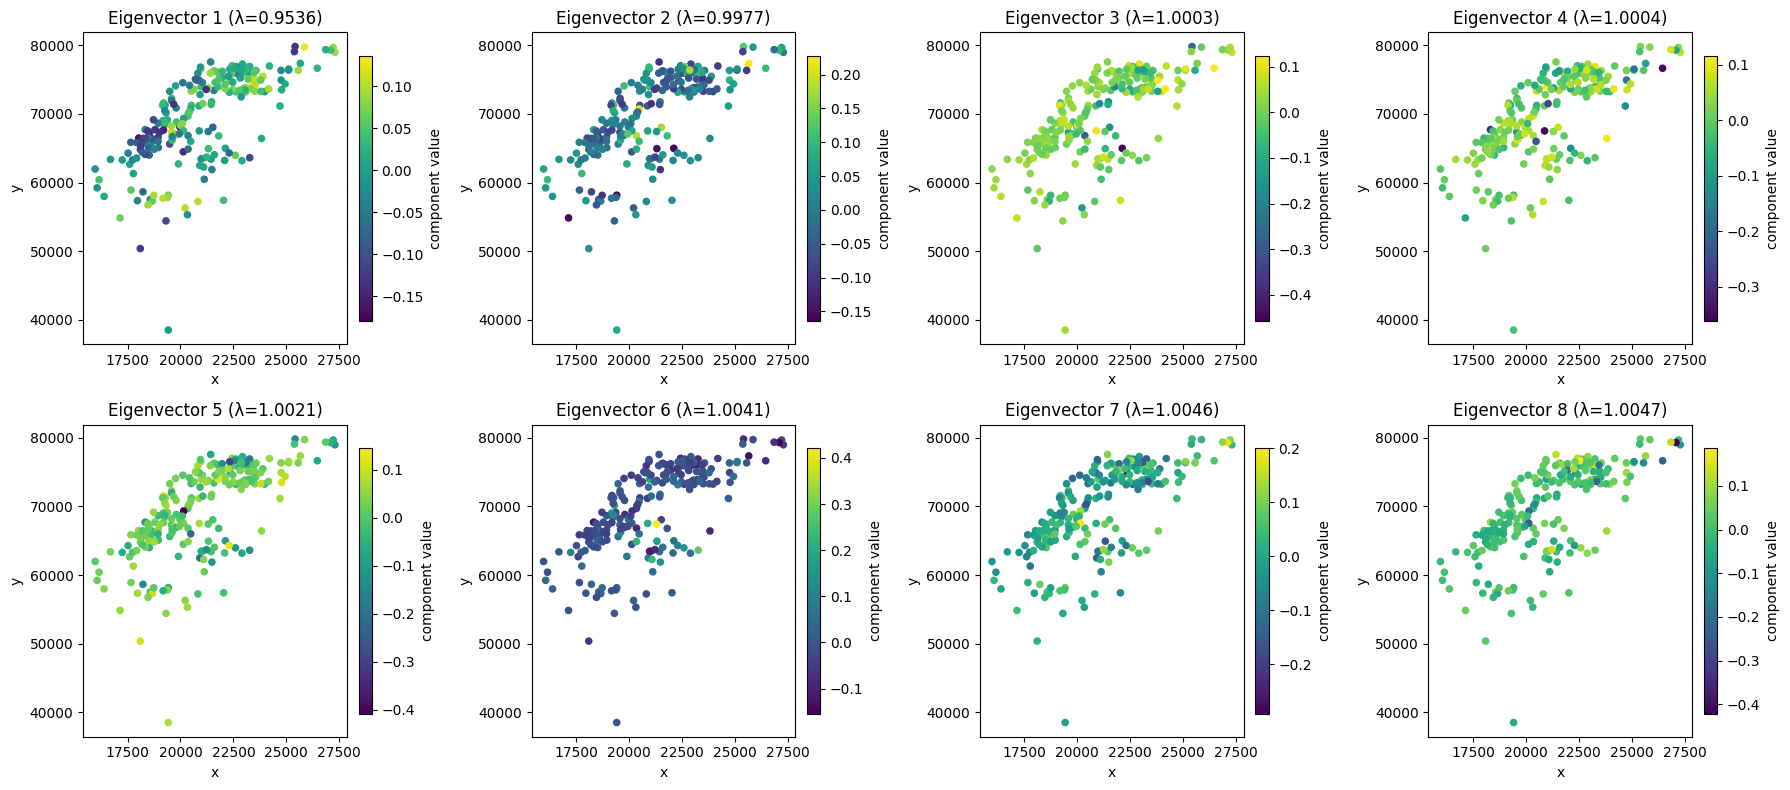

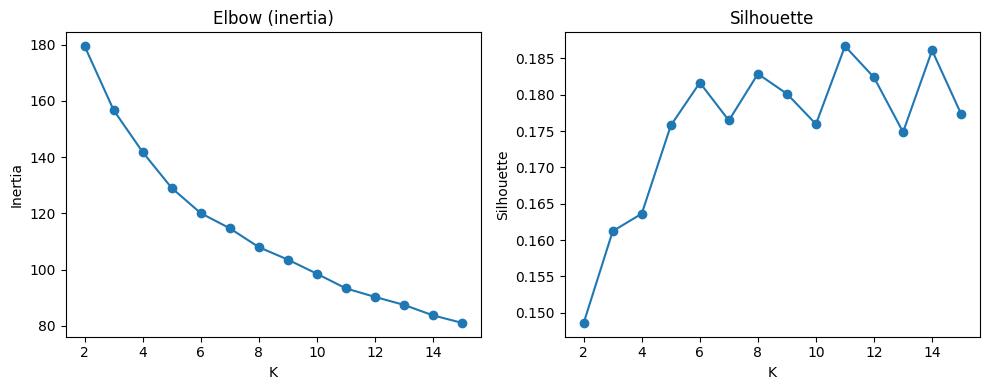

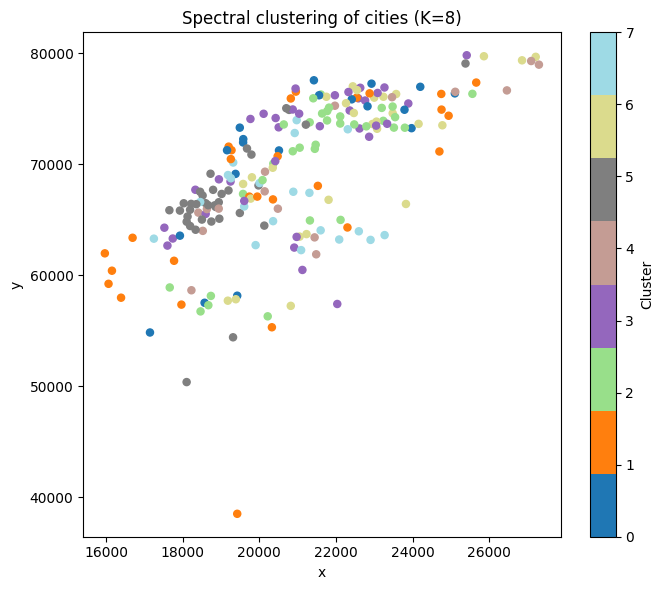

Cluster sizes:
 0    19
1    27
2    33
3    35
4    16
5    35
6    28
7    20
Name: count, dtype: int64

 significatives correlations (FDR<5%) 
Empty DataFrame
Columns: [feature, eigenvector, n, pearson_r, pearson_q, spearman_rho, spearman_q]
Index: []
no significative correlation after FDR.


C:\Users\talia\AppData\Local\Temp\ipykernel_36224\3017466321.py:196: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r,  p  = pearsonr(xf[m], yv[m])
C:\Users\talia\AppData\Local\Temp\ipykernel_36224\3017466321.py:197: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rs, ps = spearmanr(xf[m], yv[m])


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import silhouette_score
from statsmodels.stats.multitest import multipletests

# read crime file 
crime_file = "crimes_2024.csv"

# use prof code to know which col is important
columns_to_read = ["YeshuvKod", "StatisticGroupKod", "StatisticTypeKod", "Year", "Quarter"]
df = pd.read_csv(crime_file, encoding="windows-1255", usecols=columns_to_read)
df = df[df["Year"] == 2024].copy()

#create table city x type sorted by StatisticGroupKod
df_counts = (
    df.groupby(["YeshuvKod", "StatisticGroupKod"])
      .size()
      .unstack(fill_value=0)
      .sort_index(axis=1)         
)

print("city x type table size :", df_counts.shape)
print(df_counts.head())


# read cities.xls and merge
cities_file = "cities.xls"
df_cities_raw = pd.read_excel(cities_file)
cols_map = {c.lower(): c for c in df_cities_raw.columns}

symbol_col      = cols_map.get("symbol", None)
coordinates_col = cols_map.get("coordinates", None)
population_col  = cols_map.get("population", None)

if not all([symbol_col, coordinates_col, population_col]):
    raise ValueError(
        "Cannot find researched cols in cities.xls. "
        f"Columns founded: {list(df_cities_raw.columns)}\n"
    )

df_cities = df_cities_raw[[symbol_col, coordinates_col, population_col]].copy()
df_cities.columns = ["YeshuvKod", "coordinates", "population"]

# merge and clean data
df_merged = pd.merge(df_counts, df_cities, on="YeshuvKod", how="left")
df_merged["population"] = pd.to_numeric(df_merged["population"], errors="coerce")
df_merged = df_merged[df_merged["population"].notna() & (df_merged["population"] > 0)].copy()

df_merged["coordinates"] = pd.to_numeric(df_merged["coordinates"], errors="coerce")
df_merged = df_merged[df_merged["coordinates"].notna()].copy()

coord_str = df_merged["coordinates"].astype(np.int64).astype(str).str.zfill(10)
df_merged["x"] = coord_str.str[:5].astype(float)
df_merged["y"] = coord_str.str[5:].astype(float)

print("Table size after merging and cleaning :", df_merged.shape)
print(df_merged.head())

#Q3 - laplacian matrix 
crime_cols = [c for c in df_merged.columns if isinstance(c, (int, np.integer))]
X_counts = df_merged[crime_cols].to_numpy(dtype=float)
pop = df_merged["population"].to_numpy(dtype=float)
rates = (X_counts / pop[:, None]) * 100_000.0

# cosine similarity 
def build_W_from_rates_baseline(rates):
    X = rates.astype(float)
    norms = np.linalg.norm(X, axis=1, keepdims=True)
    norms[norms == 0] = 1.0
    Xn = X / norms
    W = Xn @ Xn.T
    np.fill_diagonal(W, 0.0)
    W[W < 0] = 0.0
    return W

W = build_W_from_rates_baseline(rates)

#lsym 
deg = W.sum(axis=1)
D = np.diag(deg)
with np.errstate(divide='ignore'):
    inv_sqrt_deg = 1.0 / np.sqrt(deg)
inv_sqrt_deg[~np.isfinite(inv_sqrt_deg)] = 0.0
D_inv_sqrt = np.diag(inv_sqrt_deg)
L_sym = np.eye(W.shape[0]) - D_inv_sqrt @ W @ D_inv_sqrt

print("W:", W.shape, "| L_sym:", L_sym.shape)



#Q4 - eigenvectors and plotting
eigvals, eigvecs = np.linalg.eigh(L_sym)
eps = 1e-10
nontrivial_idx = np.where(eigvals > eps)[0]
m = min(8, len(nontrivial_idx))        
lead_idxs = nontrivial_idx[:m]
lead_vals = eigvals[lead_idxs]
lead_vecs = eigvecs[:, lead_idxs]
print("Smallest non-trivial eigenvalues:", lead_vals)

# eigenvectors display 
x = df_merged["x"].to_numpy()
y = df_merged["y"].to_numpy()
rows, cols = 2, 4
plt.figure(figsize=(4.5*cols, 8))
for i in range(m):
    v = lead_vecs[:, i]
    ax = plt.subplot(rows, cols, i+1)
    sc = ax.scatter(x, y, c=v, s=20)
    ax.set_title(f"Eigenvector {i+1} (λ={lead_vals[i]:.4f})")
    ax.set_xlabel("x"); ax.set_ylabel("y")
    plt.colorbar(sc, ax=ax, fraction=0.046, pad=0.04).set_label("component value")
plt.tight_layout(); plt.show()


# Q5 - spectral clustering of the cities
U = lead_vecs
row_norms = np.linalg.norm(U, axis=1, keepdims=True)
row_norms[row_norms == 0] = 1.0
U_norm = U / row_norms

Ks = list(range(2, 16))
inertias, sils = [], []
for K in Ks:
    km = KMeans(n_clusters=K, n_init=20, random_state=42)
    lab_tmp = km.fit_predict(U_norm)
    inertias.append(km.inertia_)
    sils.append(silhouette_score(U_norm, lab_tmp))

plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.plot(Ks, inertias, marker='o'); plt.title("Elbow (inertia)")
plt.xlabel("K"); plt.ylabel("Inertia")
plt.subplot(1,2,2); plt.plot(Ks, sils, marker='o'); plt.title("Silhouette")
plt.xlabel("K"); plt.ylabel("Silhouette")
plt.tight_layout(); plt.show()

# final k 
best_K = Ks[int(np.argmax(sils))]
used_K = 8
kmeans = KMeans(n_clusters=used_K, n_init=50, random_state=42).fit(U_norm)
labels = kmeans.labels_
df_merged["cluster"] = labels

# plot final
cmap = plt.get_cmap("tab20", used_K)
plt.figure(figsize=(7, 6))
sc = plt.scatter(x, y, c=labels, s=26, cmap=cmap, vmin=0, vmax=used_K-1)
plt.title(f"Spectral clustering of cities (K={used_K})")
plt.xlabel("x"); plt.ylabel("y")
plt.colorbar(sc, ticks=range(used_K), label="Cluster")
plt.tight_layout(); plt.show()

print("Cluster sizes:\n", pd.Series(labels).value_counts().sort_index())



#Q6 
# eigenvec mat and city key
EV = pd.DataFrame(lead_vecs, columns=[f'ev{i+1}' for i in range(lead_vecs.shape[1])])
EV['YeshuvKod'] = df_merged['YeshuvKod'].values

cities_full = pd.read_excel('cities.xls')
if 'symbol' in cities_full.columns:
    cities_full = cities_full.rename(columns={'symbol':'YeshuvKod'})

Z = (
    EV
    .merge(cities_full, on='YeshuvKod', how='left')
    .merge(
        df_merged[['YeshuvKod','population','x','y']],
        on='YeshuvKod', how='left', suffixes=('','_dup')
    )
)

num_cols = []
for c in Z.columns:
    if c.startswith('ev') or c == 'YeshuvKod':
        continue
    if c.endswith('_dup'):
        continue
    xnum = pd.to_numeric(Z[c], errors='coerce')
    if np.issubdtype(xnum.dtype, np.number):
        num_cols.append(c)
num_cols = [c for c in num_cols if c != 'coordinates']  

rows = []
for feat in num_cols:
    xf = pd.to_numeric(Z[feat], errors='coerce')
    for j in range(lead_vecs.shape[1]):      
        yv = Z[f'ev{j+1}']
        m = xf.notna() & yv.notna()
        if m.sum() >= 10:  
            r,  p  = pearsonr(xf[m], yv[m])
            rs, ps = spearmanr(xf[m], yv[m])
            rows.append({
                'feature': feat,
                'eigenvector': j+1,
                'n': int(m.sum()),
                'pearson_r': r,  'pearson_p': p,
                'spearman_rho': rs, 'spearman_p': ps
            })

corr_df = pd.DataFrame(rows)

for pcol in ['pearson_p', 'spearman_p']:
    rej, q, _, _ = multipletests(corr_df[pcol].values, method='fdr_bh')
    corr_df[pcol.replace('_p','_q')]   = q
    corr_df[pcol.replace('_p','_sig')] = rej.astype(bool)

sig = corr_df[(corr_df['pearson_q'] < 0.05) | (corr_df['spearman_q'] < 0.05)]
sig = sig.sort_values(['pearson_q','spearman_q'])
print("\n significatives correlations (FDR<5%) ")
print(sig[['feature','eigenvector','n','pearson_r','pearson_q','spearman_rho','spearman_q']].head(20))

if not sig.empty:
    best = sig.iloc[0]
    f, evk = best['feature'], int(best['eigenvector'])
    m = Z[f].notna() & Z[f'ev{evk}'].notna()

    plt.figure(figsize=(5.2,4.2))
    xplt = Z[f][m]
    if f.lower() == 'population':
        xplt = np.log10(xplt)
        plt.xlabel('log10(population)')
    else:
        plt.xlabel(f)

    plt.scatter(xplt, Z[f'ev{evk}'][m], s=22, alpha=0.85)
    plt.ylabel(f'EV{evk}')
    plt.title(f'{f} vs EV{evk} (r={best["pearson_r"]:.2f}, q={best["pearson_q"]:.3g})')
    plt.tight_layout(); plt.show()
else:
    print("no significative correlation after FDR.")